In [1]:
import numpy as np
import importlib
import matplotlib
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel
import warnings
warnings.filterwarnings('ignore')
plt.style.use('inference.mystyle')

### ASTRID:
Modeling the CO emission, Lya forest and galaxies using ASTRID simulations .

In [2]:
from cmdstanpy import CmdStanModel
stan_model_joint_gal = CmdStanModel(stan_file="stan/joint_gal.stan")
stan_model_joint_lya = CmdStanModel(stan_file="stan/joint_lya.stan")
stan_model_auto_co = CmdStanModel(stan_file="stan/auto_co.stan")

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/mahdi/HD2/package_dev/lila/notebooks/stan/joint_gal
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/mahdi/HD2/package_dev/lila/notebooks/stan/joint_lya
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/mahdi/HD2/package_dev/lila/notebooks/stan/auto_co


In [3]:
from lila import inference
importlib.reload(inference)
from lila import stats

st_latis= stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=3)
st_pfs= stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=3)
st_desi= stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=3)
st_eboss= stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=3)
st_spec= stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=3)
st_Rz02= stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=3)
st_Rz03= stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=3)
st_Rz04= stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=3)
st_Rz06= stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=3)
st_latis.load_stat('/home/mahdi/HD2/LIM/astrid_LATIS_stats_gaussianized_peak.hdf5')
st_pfs.load_stat('/home/mahdi/HD2/LIM/astrid_PFS_stats_gaussianized_peak.hdf5')
st_desi.load_stat('/home/mahdi/HD2/LIM/astrid_DESI_stats_gaussianized_peak.hdf5')
st_eboss.load_stat('/home/mahdi/HD2/LIM/astrid_eBOSS_stats_gaussianized_peak.hdf5')
st_Rz02.load_stat('/home/mahdi/HD2/LIM/astrid_Rz02_stats_masscut11.51_gaussianized_peak.hdf5')
st_spec.load_stat('/home/mahdi/HD2/LIM/gal_maps_spec/astrid_Rz7e-4_stats_masscut11.9_gaussianized_peak_average.hdf5')
st_Rz03.load_stat('/home/mahdi/HD2/LIM/astrid_Rz03_stats_masscut11.21_gaussianized_peak.hdf5')
st_Rz04.load_stat('/home/mahdi/HD2/LIM/astrid_Rz04_stats_masscut11.31_gaussianized_peak.hdf5')
st_Rz06.load_stat('/home/mahdi/HD2/LIM/astrid_Rz06_stats_masscut11.01_gaussianized_peak.hdf5')

inf_co = inference.Infer(st=st_latis, iter_sampling=900_000, chains=6, kmax=1)
inf_co.fit_auto_lim(stan_model_auto_co)

inf_latis = inference.Infer(st=st_latis, iter_sampling=900_000, chains=6, kmax=1)
inf_latis.fit_lim_lya(stan_model_joint_lya)

inf_pfs = inference.Infer(st = st_pfs, iter_sampling=900_000, chains=6, kmax=1)
inf_pfs.fit_lim_lya(stan_model_joint_lya)

inf_desi = inference.Infer(st = st_desi, iter_sampling=900_000, chains=6, kmax=1)
inf_desi.fit_lim_lya(stan_model_joint_lya)

inf_eboss = inference.Infer(st = st_eboss, iter_sampling=900_000, chains=6, kmax=1)
inf_eboss.fit_lim_lya(stan_model_joint_lya)


INFO:Stats:Starting
[ 000000.00 ]   0: 05-10 11:04  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 05-10 11:04  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 05-10 11:04  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 05-10 11:04  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 05-10 11:04  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 05-10 11:04  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 05-10 11:04  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 05-10 11:04  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 05-10 11:04  Stats           INFO     Starting
INFO:Stats:No Galaxy stats
[ 000000.05 ]   0: 05-10 11:04  Stats           INFO     No Galaxy stats
INFO:Stats:No Galaxy stats
[ 000000.07 ]   0: 05-10 11:04  Stats           INFO     No Galaxy stats
INFO:Stats:No Galaxy stats

In [4]:
kmax= 0.5

inf_Rz7e4_kmax = inference.Infer(st = st_spec,iter_sampling=900_000, chains=6, kmax=kmax)
inf_Rz7e4_kmax.fit_lim_gal(stan_model_joint_gal)

inf_Rz02_kmax = inference.Infer(st = st_Rz02, iter_sampling=900_000, chains=6, kmax=kmax)
inf_Rz02_kmax.fit_lim_gal(stan_model_joint_gal)

inf_Rz06_kmax = inference.Infer(st = st_Rz06, iter_sampling=900_000, chains=6, kmax=kmax)
inf_Rz06_kmax.fit_lim_gal(stan_model_joint_gal)

INFO:cmdstanpy:start chain 1
[ 000346.61 ]   0: 05-10 11:09  cmdstanpy       INFO     start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
[ 000346.61 ]   0: 05-10 11:09  cmdstanpy       INFO     start chain 2
[ 000346.62 ]   0: 05-10 11:09  cmdstanpy       INFO     start chain 3
INFO:cmdstanpy:start chain 5
[ 000346.62 ]   0: 05-10 11:09  cmdstanpy       INFO     start chain 4
INFO:cmdstanpy:start chain 6
[ 000346.63 ]   0: 05-10 11:09  cmdstanpy       INFO     start chain 5
[ 000346.63 ]   0: 05-10 11:09  cmdstanpy       INFO     start chain 6
INFO:cmdstanpy:finish chain 4
[ 000372.40 ]   0: 05-10 11:10  cmdstanpy       INFO     finish chain 4
INFO:cmdstanpy:finish chain 6
[ 000372.53 ]   0: 05-10 11:10  cmdstanpy       INFO     finish chain 6
INFO:cmdstanpy:finish chain 2
[ 000372.56 ]   0: 05-10 11:10  cmdstanpy       INFO     finish chain 2
INFO:cmdstanpy:finish chain 1
[ 000372.65 ]   0: 05-10 11:10  cmdstanpy       INFO     finish 

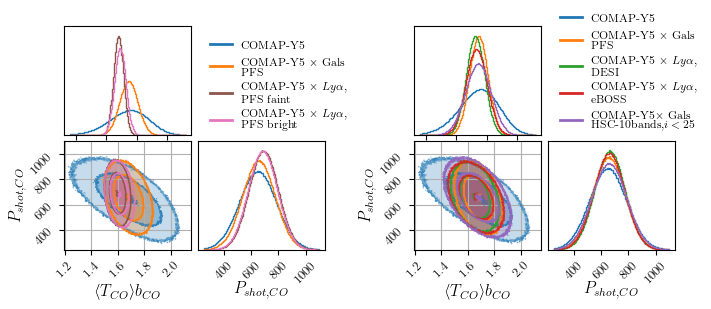

In [6]:
from lila import plot
importlib.reload(plot)
plot = plot.Inference()
plt.style.use('inference.mystyle')
fig = plt.figure(figsize=(7,3))
subfigs = fig.subfigures(1,2)

lb_Rz7e4 = 'COMAP-Y5'+r'$\ \times \ $'+'Gals \n'+'PFS'
lb_Rz02 = 'COMAP-Y5'+r'$\times\ $'+'Gals \n'+'HSC-10bands,'+r'$i < 25$'
lb_Rz06 = 'COMAP-Y5'+r'$\times\ $'+'Gals \n'+' HSC-6bands,'+r'$i < 26$'
lb_latis = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'PFS faint'
lb_pfs = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'PFS bright'
lb_desi = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'DESI'
lb_eboss = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'eBOSS'
c_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
#Tb_co_true = np.median(inf_co.samples[:,0])
#pshot_co_true = np.median(inf_co.samples[:,1])
Tb_co_true = None
pshot_co_true = None
_ = plot.Tbco_pshot([inf_co.samples, inf_Rz7e4_kmax.samples, inf_latis.samples, inf_pfs.samples], colors=['C0','C1','C5','C6'], 
        labels=['COMAP-Y5', lb_Rz7e4, lb_latis,lb_pfs],
        pshot_co_true=pshot_co_true, Tb_co_true = Tb_co_true, fig = subfigs[0])

_ = plot.Tbco_pshot([inf_co.samples, inf_Rz7e4_kmax.samples, inf_desi.samples, inf_eboss.samples, inf_Rz02_kmax.samples], colors=['C0','C1','C2', 'C3','C4'], 
        labels=['COMAP-Y5', lb_Rz7e4, lb_desi, lb_eboss, lb_Rz02], 
        pshot_co_true=pshot_co_true, Tb_co_true = Tb_co_true, fig=subfigs[1])


fig.savefig('/home/mahdi/HD2/LIM/Figures/Tbco_pshot_ASTRID.pdf', bbox_inches='tight')

In [82]:
from lila import plot
importlib.reload(plot)
plot = plot.Inference()

lb_Rz7e4 = 'COMAP-Y5 $\ \\times \ $ Gals '+'PFS'
lb_Rz02 = 'COMAP-Y5 $\ \\times \ $ Gals '+'HSC-10bands, i < 25'
lb_Rz06 = 'COMAP-Y5 $\ \\times \ $ Gals '+' HSC-6bands, i < 26'
lb_latis = 'COMAP-Y5  \ $\ \\times  \ Ly\\alpha$, '+'PFS faint'
lb_pfs = 'COMAP-Y5  \ $\ \\times  \ Ly\\alpha$, '+'PFS bright'
lb_desi = 'COMAP-Y5  \ $\ \\times  \ Ly\\alpha$, '+'DESI'
lb_eboss = 'COMAP-Y5  \ $\ \\times \ Ly\\alpha$, '+'eBOSS'


plot.latex_table_tbco_pshot([inf_co.samples, inf_Rz06_kmax.samples, inf_Rz02_kmax.samples, inf_Rz7e4_kmax.samples, 
                             inf_eboss.samples, inf_desi.samples,inf_pfs.samples, inf_latis.samples],
                             ['COMAP-Y5', lb_Rz06, lb_Rz02, lb_Rz7e4, lb_eboss, lb_desi, lb_pfs, lb_latis])

<class 'list'>


25


[ 004132.09 ]   0: 05-09 14:23  root            WARNING  Too few points to create valid contours
[ 004132.46 ]   0: 05-09 14:23  root            WARNING  Too few points to create valid contours
[ 004133.53 ]   0: 05-09 14:23  root            WARNING  Too few points to create valid contours
[ 004133.86 ]   0: 05-09 14:23  root            WARNING  Too few points to create valid contours
[ 004134.83 ]   0: 05-09 14:23  root            WARNING  Too few points to create valid contours


KeyboardInterrupt: 

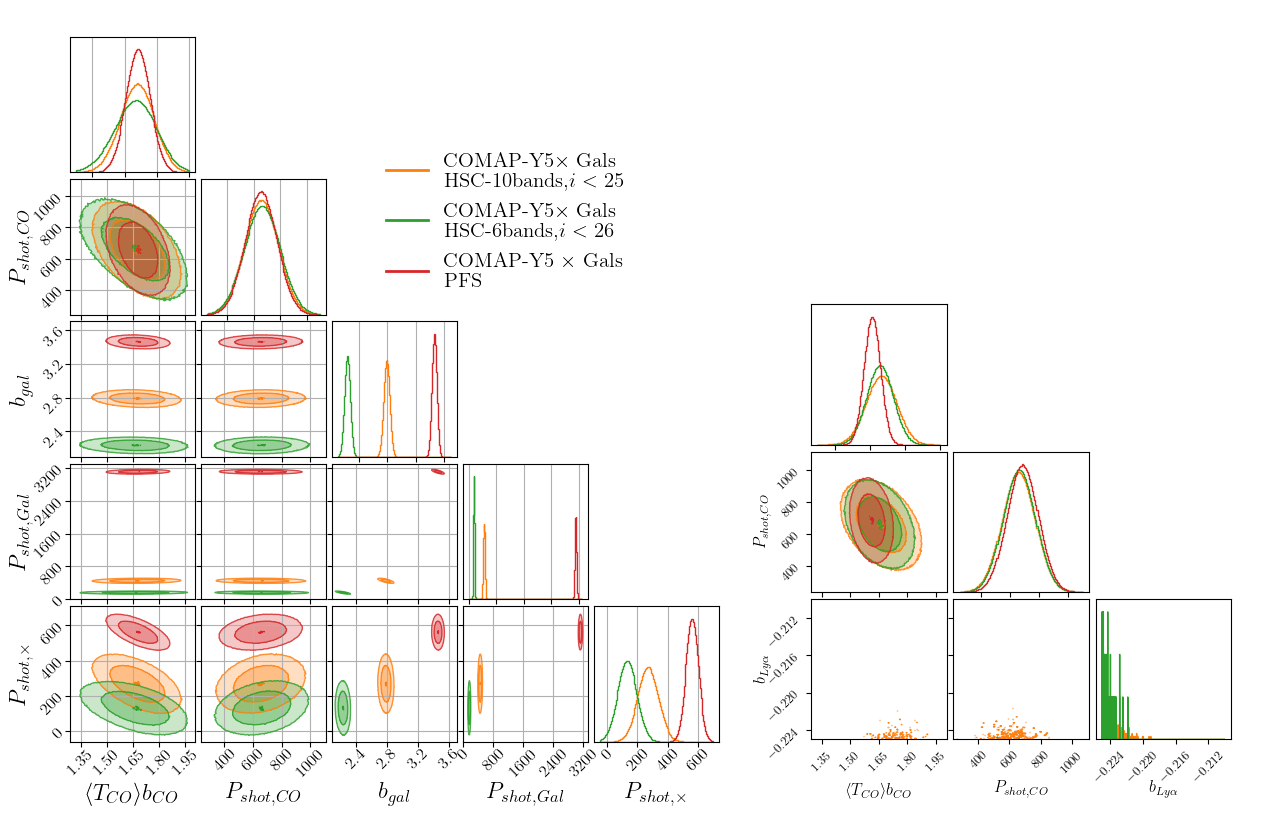

In [5]:
from lila import plot
importlib.reload(plot)
plot = plot.Inference()

fig = plt.figure(figsize=(12.5,8))
subfigs = fig.subfigures(1,2, width_ratios=[5,3.5], wspace=0.0)
subfigs2 = subfigs[1].subfigures(2,1, height_ratios=[1.5,3])[1]

plt.style.use('inference.mystyle')
zerr = r'$$'
dp = r'$d_{\perp}$'
lb_Rz7e4 = 'COMAP-Y5'+r'$\ \times \ $'+'Gals \n'+'PFS'
lb_Rz02 = 'COMAP-Y5'+r'$\times\ $'+'Gals \n'+'HSC-10bands,'+r'$i < 25$'
lb_Rz06 = 'COMAP-Y5'+r'$\times\ $'+'Gals \n'+' HSC-6bands,'+r'$i < 26$'
lb_latis = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'PFS faint'
lb_pfs = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'PFS bright'
lb_desi = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'DESI'
lb_eboss = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'eBOSS'
#truths = [inf_co.Tbco, inf_co.pshot_co, None, None, None]
truths = [None, None, None, None, None]

plot.all_params_corner(fig=subfigs[0], infs=[inf_Rz02_kmax, inf_Rz06_kmax, inf_Rz7e4_kmax], colors=['C1','C2','C3'], 
                    labels=[lb_Rz02, lb_Rz06, lb_Rz7e4], truths=truths)

plot.all_params_corner(subfigs2, infs=[inf_eboss, inf_desi, inf_pfs, inf_latis], colors=['C1', 'C2', 'C3','C4'],
                    labels=[lb_eboss, lb_desi, lb_pfs, lb_latis],truths=[None, None, None])
fig.tight_layout()
fig.savefig('/home/mahdi/HD2/LIM/Figures/all_params_ASTRID.pdf', bbox_inches='tight')


[<lila.stats.Stats object at 0x7fc91b7eb1c0>, <lila.stats.Stats object at 0x7fc9737e1970>, <lila.stats.Stats object at 0x7fc91b8aa4f0>]
[<lila.stats.Stats object at 0x7fc91b7eb1c0>, <lila.stats.Stats object at 0x7fc9737e1970>, <lila.stats.Stats object at 0x7fc91b8aa4f0>]
[<lila.stats.Stats object at 0x7fc91b7eb1c0>, <lila.stats.Stats object at 0x7fc9737e1970>, <lila.stats.Stats object at 0x7fc91b8aa4f0>]
(33,)
[<lila.stats.Stats object at 0x7fc941259e80>, <lila.stats.Stats object at 0x7fc91b90edf0>, <lila.stats.Stats object at 0x7fc9737e5580>, <lila.stats.Stats object at 0x7fc9737dc940>]
(33,)
[<lila.stats.Stats object at 0x7fc941259e80>, <lila.stats.Stats object at 0x7fc91b90edf0>, <lila.stats.Stats object at 0x7fc9737e5580>, <lila.stats.Stats object at 0x7fc9737dc940>]
(33,)
[<lila.stats.Stats object at 0x7fc941259e80>, <lila.stats.Stats object at 0x7fc91b90edf0>, <lila.stats.Stats object at 0x7fc9737e5580>, <lila.stats.Stats object at 0x7fc9737dc940>]
(33,)
[<lila.stats.Stats object

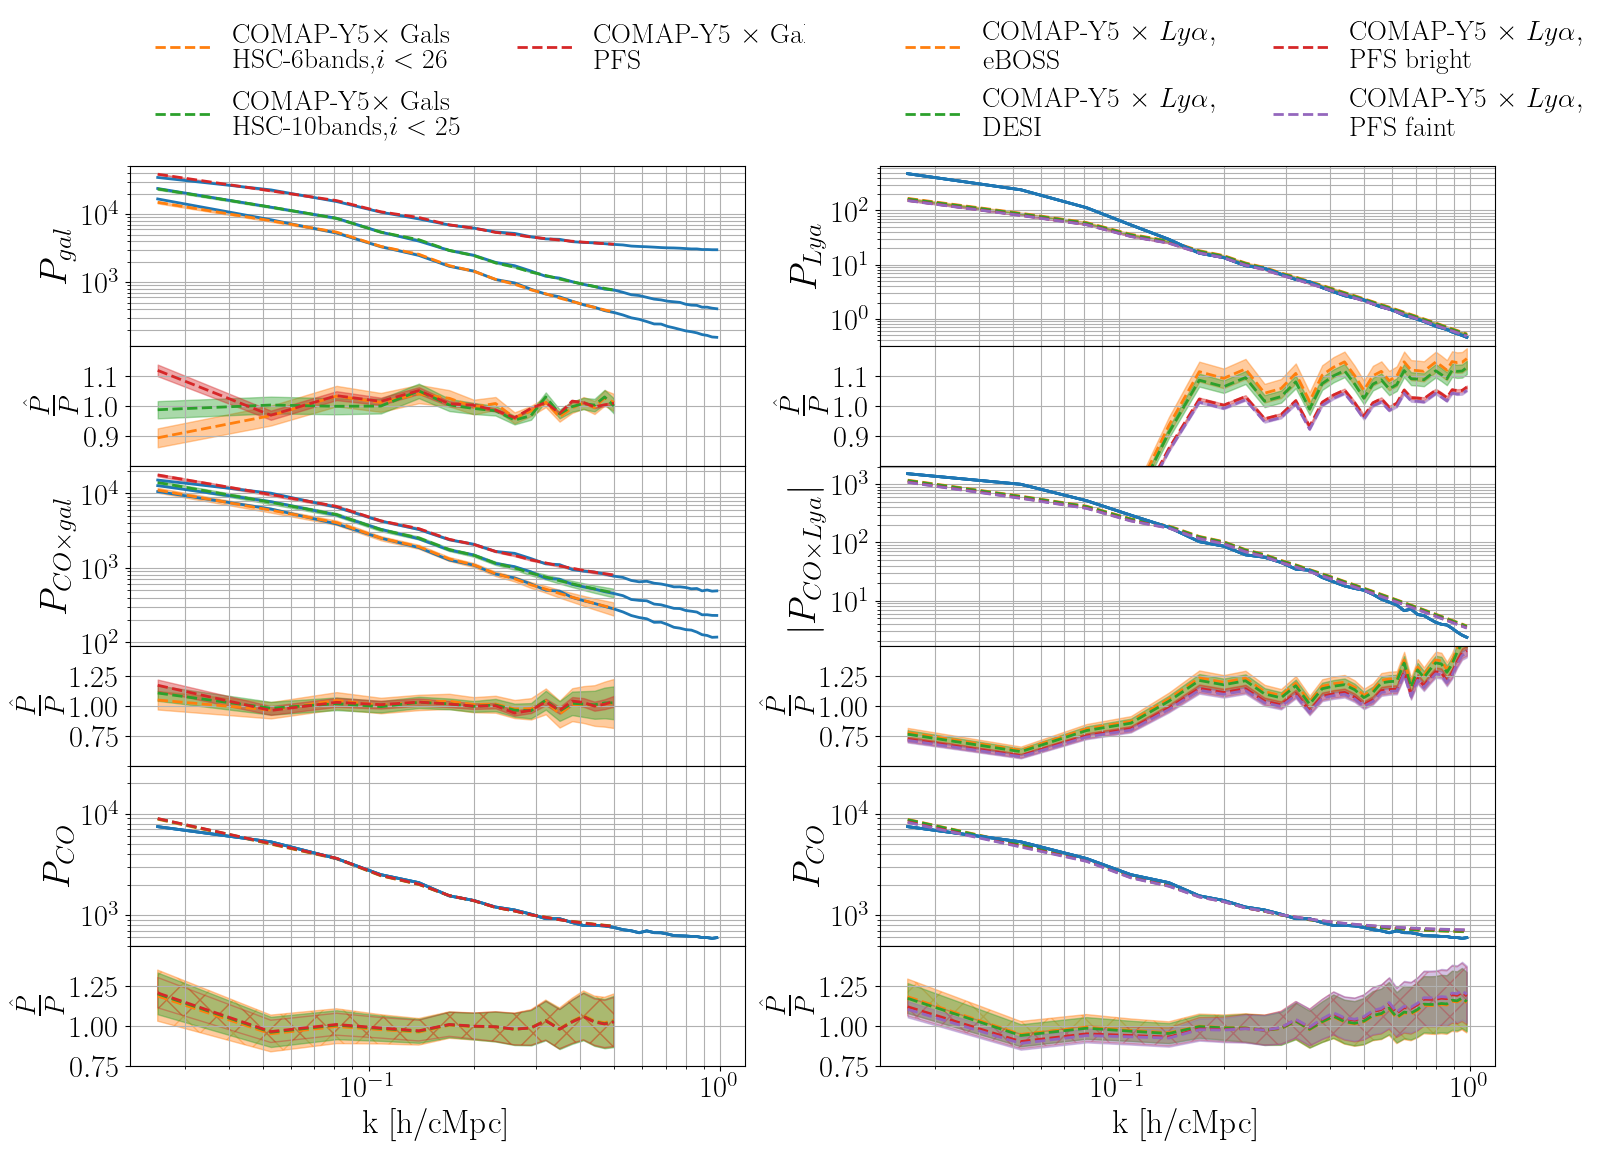

In [7]:
from lila import plot
importlib.reload(plot)
plot = plot.Inference()

fig = plt.figure(figsize=(15,12))
#floor_top = 0.28
subfigs = fig.subfigures(1,2, width_ratios=[1,1], wspace=0)
plot.model_vs_signal(fig=subfigs[0], infs=[inf_Rz06_kmax, inf_Rz02_kmax, inf_Rz7e4_kmax], stats=[st_Rz06, st_Rz02, st_spec], colors=['C1','C2','C3'], 
                    labels=[lb_Rz06, lb_Rz02, lb_Rz7e4])

plot.model_vs_signal(fig=subfigs[1], infs=[inf_eboss, inf_desi, inf_pfs, inf_latis], stats=[st_eboss, st_desi, st_pfs, st_latis], colors=['C1', 'C2', 'C3','C4'],
                    labels=[lb_eboss, lb_desi, lb_pfs, lb_latis])

fig.tight_layout()
fig.savefig('/home/mahdi/HD2/LIM/Figures/model_vs_signal.pdf', bbox_inches='tight')

## Inference with TNG:

Only checking the Lya forest.

In [2]:
import h5py
with h5py.File('/run/media/mahdi/HD2/LIM/TNG_PFS_stats.hdf5','r') as f:
    print(f.keys())

<KeysViewHDF5 ['Git', 'co_lya_pk', 'co_lya_pkmu', 'co_pk', 'lya_pk', 'lya_pkmu', 'sigma_co_lya_pk', 'sigma_co_pk', 'sigma_lya_pk']>


In [3]:
from os import stat
from lila import stats
st_latis_tng = stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=6)
st_pfs_tng = stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=6)
st_desi_tng = stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=6)
st_eboss_tng = stats.Stats(kmin=1/250, z=2.499999947500001, vol_ratio=6)


st_latis_tng.load_stat('/home/mahdi/HD2/LIM/TNG_LATIS_stats_gaussianized_peak.hdf5')
st_pfs_tng.load_stat('/home/mahdi/HD2/LIM/TNG_PFS_stats_gaussianized_peak.hdf5')
st_desi_tng.load_stat('/home/mahdi/HD2/LIM/TNG_DESI_stats_gaussianized_peak.hdf5')
st_eboss_tng.load_stat('/home/mahdi/HD2/LIM/TNG_eBOSS_stats_gaussianized_peak.hdf5')




from lila import inference
importlib.reload(inference)

inf_co_tng = inference.Infer(st=st_latis_tng, iter_sampling=900_000, chains=6, kmax=1)
inf_co_tng.fit_auto_lim(stan_model_auto_co)

inf_latis_tng = inference.Infer(st=st_latis_tng, iter_sampling=900_000, chains=6, kmax=1)
inf_latis_tng.fit_lim_lya(stan_model_joint_lya)

inf_pfs_tng = inference.Infer(st = st_pfs_tng, iter_sampling=900_000, chains=6, kmax=1)
inf_pfs_tng.fit_lim_lya(stan_model_joint_lya)

inf_desi_tng = inference.Infer(st = st_desi_tng, iter_sampling=900_000, chains=6, kmax=1)
inf_desi_tng.fit_lim_lya(stan_model_joint_lya)

inf_eboss_tng = inference.Infer(st = st_eboss_tng, iter_sampling=900_000, chains=6, kmax=1)
inf_eboss_tng.fit_lim_lya(stan_model_joint_lya)

INFO:Stats:Starting
[ 000000.00 ]   0: 03-24 19:00  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 03-24 19:00  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 03-24 19:00  Stats           INFO     Starting
INFO:Stats:Starting
[ 000000.00 ]   0: 03-24 19:00  Stats           INFO     Starting
INFO:Stats:No Galaxy stats
[ 000000.01 ]   0: 03-24 19:00  Stats           INFO     No Galaxy stats
INFO:Stats:No Galaxy stats
[ 000000.01 ]   0: 03-24 19:00  Stats           INFO     No Galaxy stats
INFO:Stats:No Galaxy stats
[ 000000.01 ]   0: 03-24 19:00  Stats           INFO     No Galaxy stats
INFO:Stats:No Galaxy stats
[ 000000.02 ]   0: 03-24 19:00  Stats           INFO     No Galaxy stats
INFO:cmdstanpy:start chain 1
[ 000002.40 ]   0: 03-24 19:00  cmdstanpy       INFO     start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
[ 000002.41 ]   0: 03-24 19:00  cmdstanpy       INFO     start chain 2
INFO:cmdstanpy:start chain 

(33,)
[<lim_lytomo.stats.Stats object at 0x7f13c428f7f0>, <lim_lytomo.stats.Stats object at 0x7f135ae68790>, <lim_lytomo.stats.Stats object at 0x7f13c4328910>, <lim_lytomo.stats.Stats object at 0x7f1379156490>]
(33,)
[<lim_lytomo.stats.Stats object at 0x7f13c428f7f0>, <lim_lytomo.stats.Stats object at 0x7f135ae68790>, <lim_lytomo.stats.Stats object at 0x7f13c4328910>, <lim_lytomo.stats.Stats object at 0x7f1379156490>]
(33,)
[<lim_lytomo.stats.Stats object at 0x7f13c428f7f0>, <lim_lytomo.stats.Stats object at 0x7f135ae68790>, <lim_lytomo.stats.Stats object at 0x7f13c4328910>, <lim_lytomo.stats.Stats object at 0x7f1379156490>]
(33,)
[<lim_lytomo.stats.Stats object at 0x7f13c428f7f0>, <lim_lytomo.stats.Stats object at 0x7f135ae68790>, <lim_lytomo.stats.Stats object at 0x7f13c4328910>, <lim_lytomo.stats.Stats object at 0x7f1379156490>]
9


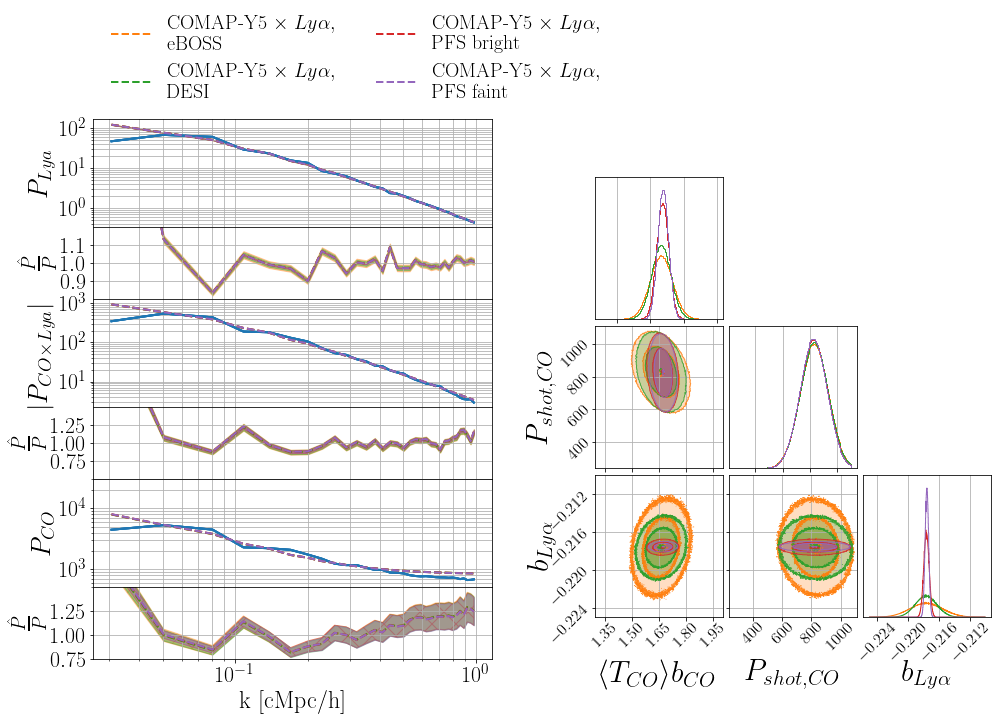

In [17]:
from lila import plot
importlib.reload(plot)
plot = plot.Inference()

fig = plt.figure(figsize=(13.5,10))
subfigs = fig.subfigures(1,2, width_ratios=[1,1], wspace=0)
subfigs_params = subfigs[1].subfigures(2,1, height_ratios=[1,3])[1]

plt.style.use('inference.mystyle')

lb_latis = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'PFS faint'
lb_pfs = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'PFS bright'
lb_desi = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'DESI'
lb_eboss = 'COMAP-Y5'+r'$ \ \times \ Ly\alpha,$'+'\n'+'eBOSS'

truths = [None, None, None, None, None]

plot.model_vs_signal(fig=subfigs[0], infs=[inf_eboss_tng, inf_desi_tng, inf_pfs_tng, inf_latis_tng],
                    stats=[st_eboss_tng, st_desi_tng, st_pfs_tng, st_latis_tng],
                    colors=['C1', 'C2', 'C3','C4'],
                    labels=[lb_eboss, lb_desi, lb_pfs, lb_latis])

plot.all_params_corner(subfigs_params, infs=[inf_eboss_tng, inf_desi_tng, inf_pfs_tng, inf_latis_tng], colors=['C1', 'C2', 'C3','C4'],
                    labels=None,truths=[None, None, None], tick_label_size=16,  axis_label_size= 30)

fig.savefig('/home/mahdi/HD2/LIM/Figures/Lya_all_params_TNG.pdf', bbox_inches='tight')


In [15]:
median = np.median(inf_latis.samples, axis=0)
std = np.std(inf_latis.samples, axis=0)
print(median, std)

[ 2.67487e+00  1.53605e+03 -2.17525e-01] [5.04831797e-02 2.55967132e+02 2.94590090e-04]
